### Importation des librairies et du DataFrame fusionné 
### + exploration pour vérification des potentiels erreurs d'importation :

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [3]:
LFB_fusion = pd.read_csv('LFB_fusion.csv', low_memory = False)

In [6]:
LFB_fusion['CalYear'].unique()

array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 2021, 2022, 2023, 2024])

### Sélection des variables pertinentes à notre futur modèle de machine learning et création du DataFrame :

In [7]:
LFB2 = LFB_fusion[['CalYear','HourOfCall', 'StopCodeDescription','PropertyCategory',
                   'Easting_rounded', 'Northing_rounded', 'FirstPumpArriving_AttendanceTime',
                   'DeployedFromStation_Name','OPINION','Visibility']]

In [9]:
LFB2.head()

,CalYear,HourOfCall,StopCodeDescription,PropertyCategory,Easting_rounded,Northing_rounded,FirstPumpArriving_AttendanceTime,DeployedFromStation_Name,OPINION,Visibility
0,2009,0,Special Service,Road Vehicle,528650,176850,319.0,Battersea,météo très défavorable,moyenne
1,2009,0,Secondary Fire,Outdoor,533750,194450,308.0,Edmonton,météo très défavorable,moyenne
2,2009,0,Secondary Fire,Outdoor,507750,182850,210.0,Hillingdon,météo très défavorable,moyenne
3,2009,0,Secondary Fire,Outdoor,531050,185350,233.0,Holloway,météo très défavorable,moyenne
4,2009,0,AFA,Dwelling,529450,185250,172.0,Kentish Town,météo très défavorable,moyenne


### Transformation du format de la variable cible en format int (entier) :

In [15]:
LFB2['FirstPumpArriving_AttendanceTime'].astype(int)

0          319
1          308
2          210
3          233
4          172
          ... 
1561164    253
1561165    401
1561166    315
1561167    331
1561168    126
Name: FirstPumpArriving_AttendanceTime, Length: 1561163, dtype: int64

### Exploration du DataFrame :

In [17]:
LFB2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1561163 entries, 0 to 1561168
Data columns (total 10 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   CalYear                           1561163 non-null  int64  
 1   HourOfCall                        1561163 non-null  int64  
 2   StopCodeDescription               1561163 non-null  object 
 3   PropertyCategory                  1561163 non-null  object 
 4   Easting_rounded                   1561163 non-null  int64  
 5   Northing_rounded                  1561163 non-null  int64  
 6   FirstPumpArriving_AttendanceTime  1561163 non-null  float64
 7   DeployedFromStation_Name          1561155 non-null  object 
 8   OPINION                           1560925 non-null  object 
 9   Visibility                        1560925 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 131.0+ MB


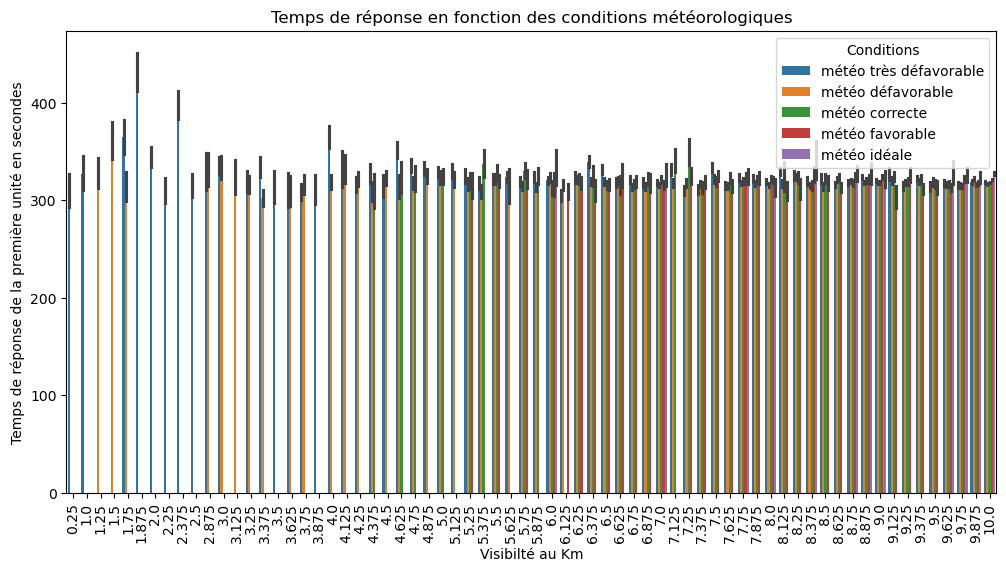

In [42]:
# Visualisation de la relation entre les variables météo et visibility avec la variable cible :
plt.figure(figsize=(12,6))
sns.barplot(data = LFB_fusion, x = 'VISIBILITY_AVG_KM', y = 'FirstPumpArriving_AttendanceTime', hue ='OPINION');
plt.xticks(rotation = 90)
plt.legend(title = "Conditions")
plt.xlabel('Visibilté au Km')
plt.ylabel("Temps de réponse de la première unité en secondes")
plt.title("Temps de réponse en fonction des conditions météorologiques")
plt.show();

### Importation du fichier en format "csv" :

In [19]:
LFB2.to_csv('LFB2.csv')